In [73]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from PIL import Image

import keras
from keras.models import Sequential
from keras.layers import Conv2D,MaxPool2D,Dropout,BatchNormalization,Flatten,Dense
from keras.preprocessing.image import ImageDataGenerator,img_to_array,load_img

In [75]:
BASE_DIR = os.listdir('../input/100-bird-species')

In [76]:
BASE_DIR 

['train', 'consolidated', 'valid', 'test']

In [77]:
TRAIN_DIR = os.listdir('../input/100-bird-species/train/')
TEST_DIR = os.listdir('../input/100-bird-species/test/')
VALIDATION_DIR = os.listdir('../input/100-bird-species/valid/')

In [78]:
print('Number of Categories in train directory: ',len(TRAIN_DIR))
print('Number of Categories in test directory: ',len(TEST_DIR))
print('Number of Categories in validation directory: ',len(VALIDATION_DIR))

Number of Categories in train directory:  200
Number of Categories in test directory:  200
Number of Categories in validation directory:  200


In [79]:
Categories = TRAIN_DIR
print(str(len(TRAIN_DIR)),"Categories are: ",Categories)

Categories_count = len(Categories)

200 Categories are:  ['HAWAIIAN GOOSE', 'TAIWAN MAGPIE', 'PAINTED BUNTIG', 'ALEXANDRINE PARAKEET', 'PEACOCK', 'HORNBILL', 'AMERICAN PIPIT', 'GREY PLOVER', 'COCK OF THE  ROCK', 'BLACK VULTURE', 'EASTERN TOWEE', 'MASKED BOOBY', 'NORTHERN JACANA', 'BROWN THRASHER', 'CAPUCHINBIRD', 'CUBAN TODY', 'BALTIMORE ORIOLE', 'BIRD OF PARADISE', 'PURPLE MARTIN', 'AMERICAN COOT', 'RING-NECKED PHEASANT', 'CROW', 'COMMON STARLING', 'QUETZAL', 'TIT MOUSE', 'STORK BILLED KINGFISHER', 'ANTBIRD', 'RAZORBILL', 'NORTHERN MOCKINGBIRD', 'STRAWBERRY FINCH', 'TEAL DUCK', 'GOLDEN CHEEKED WARBLER', 'SPOONBILL', 'BOBOLINK', 'AMERICAN GOLDFINCH', 'FRIGATE', 'IMPERIAL SHAQ', 'GREEN JAY', 'AMERICAN AVOCET', 'CRESTED AUKLET', 'EMU', 'BALD EAGLE', 'PURPLE FINCH', 'BLACK THROATED WARBLER', 'WHITE TAILED TROPIC', 'VERMILION FLYCATHER', 'GOULDIAN FINCH', 'HOUSE FINCH', 'RED FACED WARBLER', 'TURKEY VULTURE', 'JABIRU', 'VENEZUELIAN TROUPIAL', 'COMMON HOUSE MARTIN', 'FLAME TANAGER', 'NORTHERN CARDINAL', 'GOLD WING WARBLER', 'B

Let's see woodpecker 

In [80]:
sample_woodpecker_imgs = list(os.walk('../input/100-bird-species/train/DOWNY WOODPECKER/'))[0][2][:4]

In [81]:
sample_woodpecker_imgs

['044.jpg', '103.jpg', '104.jpg', '110.jpg']

In [82]:
sample_woodpecker_imgs = list(map(lambda x: os.path.join('../input/100-bird-species/train/DOWNY WOODPECKER/',x),sample_woodpecker_imgs))

In [83]:
sample_woodpecker_imgs

['../input/100-bird-species/train/DOWNY WOODPECKER/044.jpg',
 '../input/100-bird-species/train/DOWNY WOODPECKER/103.jpg',
 '../input/100-bird-species/train/DOWNY WOODPECKER/104.jpg',
 '../input/100-bird-species/train/DOWNY WOODPECKER/110.jpg']

Shape of image is:  (224, 224, 3)
Shape of image is:  (224, 224, 3)
Shape of image is:  (224, 224, 3)
Shape of image is:  (224, 224, 3)


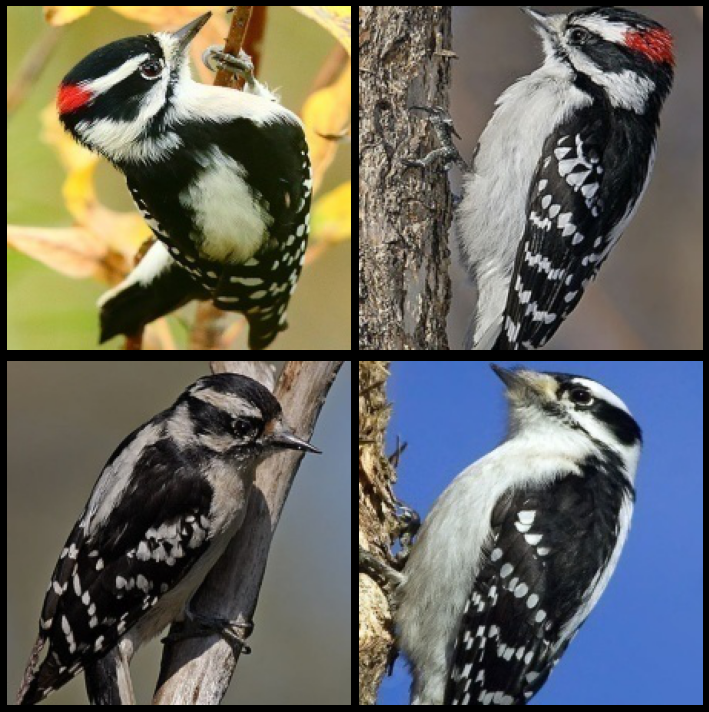

In [84]:
plt.figure(figsize=(10,10))

for i in range(len(sample_woodpecker_imgs)):
    image = Image.open(sample_woodpecker_imgs[i])
    plt.subplot(2,2,i+1)
    plt.axis("off")
    plt.imshow(image)
    image_data = img_to_array(image)
    shape = image_data.shape
    print("Shape of image is: ",shape)

plt.tight_layout() 

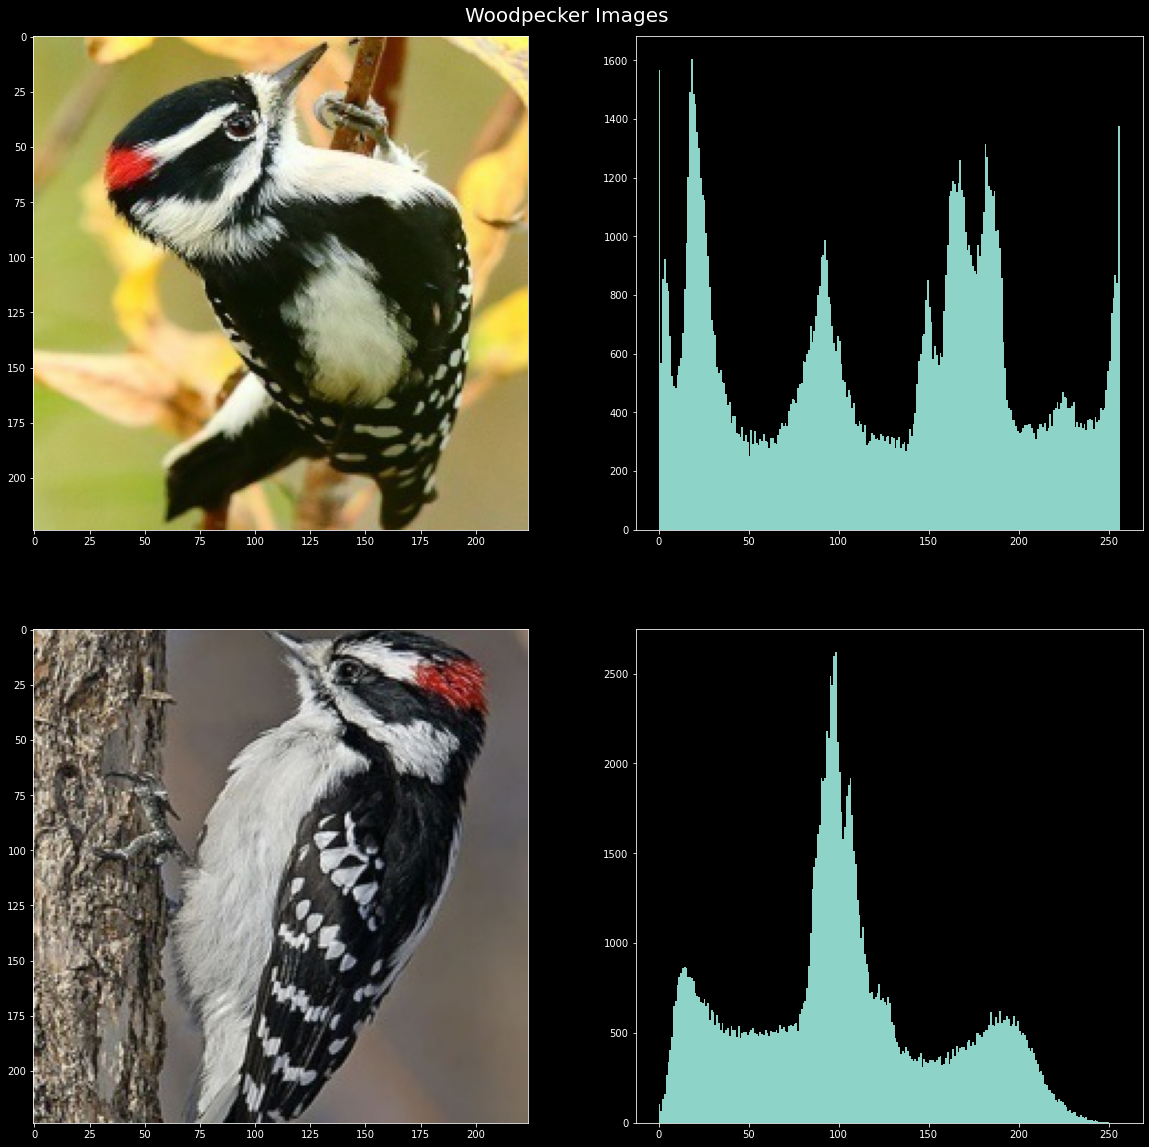

In [85]:
plt.style.use('dark_background')
fig,ax = plt.subplots(2,2,figsize=(20,20))

for i in range(2):
    image = Image.open(sample_woodpecker_imgs[i])
    #plt.axis("off")
    ax[i,0].imshow(image)
    img = img_to_array(image)
    ax[i,1].hist(img.ravel(), 256, [0,256])
        
fig.suptitle('Woodpecker Images', size=20,y=0.9)
plt.show()

In [86]:
train_gen = ImageDataGenerator(rescale=1./255,
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=90,
    width_shift_range=0.15,
    height_shift_range=0.15,
    horizontal_flip=True,
    zoom_range=[0.9, 1.25],
    brightness_range=[0.5, 1.5])

train_data = train_gen.flow_from_directory('../input/100-bird-species/train/',target_size=(224,224))
print("data groups: ",len(train_data))


valid_data = train_gen.flow_from_directory('../input/100-bird-species/valid/',target_size=(224,224))
print("data groups: ",len(valid_data))


test_data = train_gen.flow_from_directory('../input/100-bird-species/test/',target_size=(224,224))
print("data groups: ",len(test_data))

Found 27503 images belonging to 200 classes.
data groups:  860
Found 1000 images belonging to 200 classes.
data groups:  32
Found 1000 images belonging to 200 classes.
data groups:  32


In [87]:
import random

In [88]:
x = test_data.filenames

In [89]:
x

['AFRICAN FIREFINCH/1.jpg',
 'AFRICAN FIREFINCH/2.jpg',
 'AFRICAN FIREFINCH/3.jpg',
 'AFRICAN FIREFINCH/4.jpg',
 'AFRICAN FIREFINCH/5.jpg',
 'ALBATROSS/1.jpg',
 'ALBATROSS/2.jpg',
 'ALBATROSS/3.jpg',
 'ALBATROSS/4.jpg',
 'ALBATROSS/5.jpg',
 'ALEXANDRINE PARAKEET/1.jpg',
 'ALEXANDRINE PARAKEET/2.jpg',
 'ALEXANDRINE PARAKEET/3.jpg',
 'ALEXANDRINE PARAKEET/4.jpg',
 'ALEXANDRINE PARAKEET/5.jpg',
 'AMERICAN AVOCET/1.jpg',
 'AMERICAN AVOCET/2.jpg',
 'AMERICAN AVOCET/3.jpg',
 'AMERICAN AVOCET/4.jpg',
 'AMERICAN AVOCET/5.jpg',
 'AMERICAN BITTERN/1.jpg',
 'AMERICAN BITTERN/2.jpg',
 'AMERICAN BITTERN/3.jpg',
 'AMERICAN BITTERN/4.jpg',
 'AMERICAN BITTERN/5.jpg',
 'AMERICAN COOT/1.jpg',
 'AMERICAN COOT/2.jpg',
 'AMERICAN COOT/3.jpg',
 'AMERICAN COOT/4.jpg',
 'AMERICAN COOT/5.jpg',
 'AMERICAN GOLDFINCH/1.jpg',
 'AMERICAN GOLDFINCH/2.jpg',
 'AMERICAN GOLDFINCH/3.jpg',
 'AMERICAN GOLDFINCH/4.jpg',
 'AMERICAN GOLDFINCH/5.jpg',
 'AMERICAN KESTREL/1.jpg',
 'AMERICAN KESTREL/2.jpg',
 'AMERICAN KESTREL/3.

In [90]:
test_images = []
test_labels = []

for j in range(len(x)):
    test_labels.append(x[j].split('/')[0])
    test_images.append("../input/100-bird-species/test" + "/" + x[j])

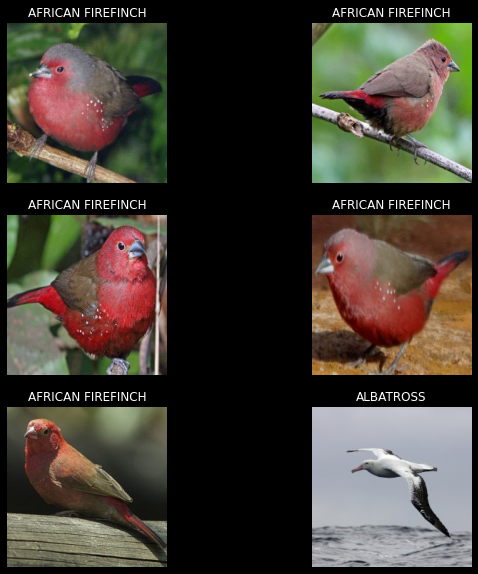

In [92]:
plt.figure(figsize=(10,10))

for i in range(0,6):
    image = Image.open(test_images[i])
    plt.subplot(3,2,i+1)
    plt.axis("off")
    plt.title(test_labels[i])
    plt.imshow(image)

In [93]:
y = train_data.filenames

In [94]:
y

['AFRICAN FIREFINCH/001.jpg',
 'AFRICAN FIREFINCH/002.jpg',
 'AFRICAN FIREFINCH/003.jpg',
 'AFRICAN FIREFINCH/004.jpg',
 'AFRICAN FIREFINCH/005.jpg',
 'AFRICAN FIREFINCH/006.jpg',
 'AFRICAN FIREFINCH/007.jpg',
 'AFRICAN FIREFINCH/008.jpg',
 'AFRICAN FIREFINCH/009.jpg',
 'AFRICAN FIREFINCH/010.jpg',
 'AFRICAN FIREFINCH/011.jpg',
 'AFRICAN FIREFINCH/012.jpg',
 'AFRICAN FIREFINCH/013.jpg',
 'AFRICAN FIREFINCH/014.jpg',
 'AFRICAN FIREFINCH/015.jpg',
 'AFRICAN FIREFINCH/016.jpg',
 'AFRICAN FIREFINCH/017.jpg',
 'AFRICAN FIREFINCH/018.jpg',
 'AFRICAN FIREFINCH/019.jpg',
 'AFRICAN FIREFINCH/020.jpg',
 'AFRICAN FIREFINCH/021.jpg',
 'AFRICAN FIREFINCH/022.jpg',
 'AFRICAN FIREFINCH/023.jpg',
 'AFRICAN FIREFINCH/024.jpg',
 'AFRICAN FIREFINCH/025.jpg',
 'AFRICAN FIREFINCH/026.jpg',
 'AFRICAN FIREFINCH/027.jpg',
 'AFRICAN FIREFINCH/028.jpg',
 'AFRICAN FIREFINCH/029.jpg',
 'AFRICAN FIREFINCH/030.jpg',
 'AFRICAN FIREFINCH/031.jpg',
 'AFRICAN FIREFINCH/032.jpg',
 'AFRICAN FIREFINCH/033.jpg',
 'AFRICAN 

In [95]:
train_images = []
train_labels = []

for j in range(len(y)):
    train_labels.append(y[j].split('/')[0])
    train_images.append("../input/100-bird-species/train" + "/" + y[j])

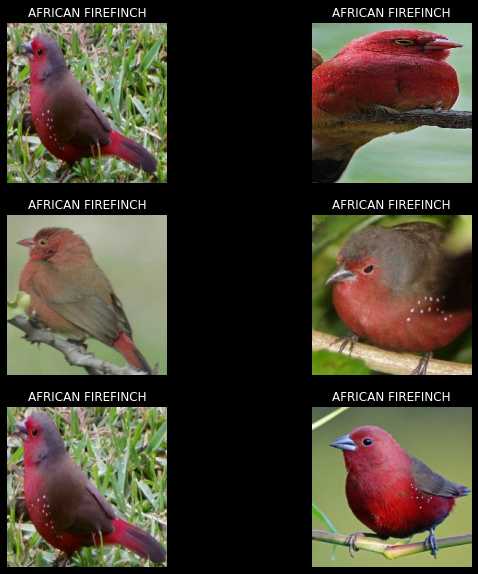

In [98]:
plt.figure(figsize=(10,10))

for i in range(0,6):
    image = Image.open(train_images[i])
    plt.subplot(3,2,i+1)
    plt.axis("off")
    plt.title(train_labels[i])
    plt.imshow(image)

In [99]:
model = Sequential()

In [100]:
#1st layer
model.add(Conv2D(64,(3,3),padding='same',strides=(1,1),activation='relu',input_shape=(224,224,3)))
model.add(MaxPool2D((2,2)))

#2nd layer
model.add(Conv2D(128,(3,3),padding='same',strides=(1,1),activation='relu'))
model.add(MaxPool2D((2,2)))

#3rd layer
model.add(Conv2D(128,(3,3),padding='same',strides=(1,1),activation='relu'))
model.add(MaxPool2D((2,2)))

In [101]:
model.add(Flatten())

In [102]:
model.add(Dense(4096,activation='relu'))
model.add(Dropout(0.4))

model.add(Dense(1000,activation='relu'))
model.add(Dropout(0.4))

model.add(Dense(Categories_count,activation='softmax'))

In [103]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 224, 224, 64)      1792      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 112, 112, 128)     73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 56, 56, 128)       0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 56, 56, 128)       147584    
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 28, 28, 128)       0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 100352)           

In [104]:
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

In [ ]:
#history = model.fit_generator( train_data, epochs = 1, validation_data = valid_data)

Epoch 1/1
137/860 [===>..........................] - ETA: 1:47:55 - loss: 5.2844 - accuracy: 0.0082